<a href="https://colab.research.google.com/github/BhaktiPradana/Project-Image-Classification/blob/main/ImageClassificationModelDeployment_BhaktiPradana_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Image Classification Model Deployment : Butterfly**
- Nama: Bhakti Pradana Roesyadi
- Email: bhaktipradana24@gmail.com
- Id Dicoding:bhaktipradana

# Module

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import itertools
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report, f1_score, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataseet

In [ ]:
dataset = {
             "train_data" : "/content/drive/MyDrive/Fast Food/Train",
             "test_data" : "/content/drive/MyDrive/Fast Food/Test",
          }
all_data = []
for path in dataset.values():
    data = {"imgpath": [] , "labels": [] }
    category = os.listdir(path)

    for folder in category:
        folderpath = os.path.join(path , folder)
        filelist = os.listdir(folderpath)
        for file in filelist:
            fpath = os.path.join(folderpath, file)
            data["imgpath"].append(fpath)
            data["labels"].append(folder)
    all_data.append(data.copy())
    data.clear()
train_df = pd.DataFrame(all_data[0] , index=range(len(all_data[0]['imgpath'])))
test_df = pd.DataFrame(all_data[1] , index=range(len(all_data[1]['imgpath'])))

lb = LabelEncoder()
train_df['encoded_labels'] = lb.fit_transform(train_df['labels'])
test_df['encoded_labels'] = lb.fit_transform(test_df['labels'])

In [ ]:
print("----------Train-------------")
print(train_df[["imgpath", "labels"]].head(5))
print(train_df.shape)
print("--------Test----------")
print(test_df[["imgpath", "labels"]].head(5))
print(test_df.shape)

----------Train-------------
                                             imgpath        labels
0  /content/drive/MyDrive/Fast Food/Train/Baked P...  Baked Potato
1  /content/drive/MyDrive/Fast Food/Train/Baked P...  Baked Potato
2  /content/drive/MyDrive/Fast Food/Train/Baked P...  Baked Potato
3  /content/drive/MyDrive/Fast Food/Train/Baked P...  Baked Potato
4  /content/drive/MyDrive/Fast Food/Train/Baked P...  Baked Potato
(15000, 3)
--------Test----------
                                             imgpath        labels
0  /content/drive/MyDrive/Fast Food/Test/Baked Po...  Baked Potato
1  /content/drive/MyDrive/Fast Food/Test/Baked Po...  Baked Potato
2  /content/drive/MyDrive/Fast Food/Test/Baked Po...  Baked Potato
3  /content/drive/MyDrive/Fast Food/Test/Baked Po...  Baked Potato
4  /content/drive/MyDrive/Fast Food/Test/Baked Po...  Baked Potato
(1500, 3)


In [ ]:

train_df_split, test_df_split = train_test_split(train_df, test_size=0.2, random_state=42)

BATCH_SIZE = 25
IMAGE_SIZE = (224, 224)
generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
)

num_classes = train_df_split['encoded_labels'].nunique()

train_images = generator.flow_from_dataframe(
    dataframe=train_df_split,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)

test_images = generator.flow_from_dataframe(
    dataframe=test_df_split,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.45),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print(f"Train set size: {len(train_df_split)} samples ({len(train_df_split) / len(train_df) * 100:.2f}%)")
print(f"test set size: {len(test_df_split)} samples ({len(test_df_split) / len(train_df) * 100:.2f}%)")

Found 12000 validated image filenames belonging to 10 classes.
Found 3000 validated image filenames belonging to 10 classes.
Train set size: 12000 samples (80.00%)
test set size: 3000 samples (20.00%)


In [ ]:
train_folder = "/content/drive/MyDrive/Fast Food/Train"

resolution_df = pd.DataFrame(columns=["Filepath", "Width", "Height"])
for foldername, subfolders, filenames in os.walk(train_folder):
    for filename in filenames:
        filepath = os.path.join(foldername, filename)
        with Image.open(filepath) as img:
            width, height = img.size

        resolution_df = resolution_df.append({"Filepath": filepath, "Width": width, "Height": height}, ignore_index=True)
print(resolution_df)

                                                Filepath Width Height
0      /content/drive/MyDrive/Fast Food/Train/Baked P...   279    181
1      /content/drive/MyDrive/Fast Food/Train/Baked P...   300    168
2      /content/drive/MyDrive/Fast Food/Train/Baked P...   194    260
3      /content/drive/MyDrive/Fast Food/Train/Baked P...   183    275
4      /content/drive/MyDrive/Fast Food/Train/Baked P...   183    275
...                                                  ...   ...    ...
14995  /content/drive/MyDrive/Fast Food/Train/Taquito...   297    170
14996  /content/drive/MyDrive/Fast Food/Train/Taquito...   280    180
14997  /content/drive/MyDrive/Fast Food/Train/Taquito...   310    163
14998  /content/drive/MyDrive/Fast Food/Train/Taquito...   259    194
14999  /content/drive/MyDrive/Fast Food/Train/Taquito...   183    275

[15000 rows x 3 columns]


# Train Model

In [ ]:
pretrained_model = tf.keras.applications.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)
for i, layer in enumerate(pretrained_model.layers):
    pretrained_model.layers[i].trainable = False

In [ ]:
num_classes = len(set(train_images.classes))
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.13),
  layers.experimental.preprocessing.RandomZoom(0.12),
  layers.experimental.preprocessing.RandomContrast(0.10),
], name='AugmentationLayer')
inputs = layers.Input(shape = (224,224,3), name='inputLayer')
x = augment(inputs)
pretrain_out = pretrained_model(x, training = False)
x = layers.Dense(256)(pretrain_out)
x = layers.Activation(activation="relu")(x)
x = BatchNormalization()(x)
x = layers.Dropout(0.45)(x)
x = layers.Dense(num_classes)(x)
outputs = layers.Activation(activation="softmax", dtype=tf.float32, name='activationLayer')(x)
model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 AugmentationLayer (Sequent  (None, 224, 224, 3)       0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024  

In [ ]:
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=test_images,
    validation_steps=len(test_images),
    epochs=10,
    callbacks=[
        EarlyStopping(monitor = "val_loss",
                               patience = 3,
                               restore_best_weights = True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min')
    ]
)
model.save_weights('./checkpoints/my_checkpoint')

Epoch 1/10
480/480 [==============================] - 68s 113ms/step - loss: 1.0838 - accuracy: 0.6624 - val_loss: 0.6708 - val_accuracy: 0.7963 - lr: 5.0000e-04
Epoch 2/10
480/480 [==============================] - 51s 106ms/step - loss: 0.7463 - accuracy: 0.7631 - val_loss: 0.5949 - val_accuracy: 0.8273 - lr: 5.0000e-04
Epoch 3/10
480/480 [==============================] - 51s 107ms/step - loss: 0.6833 - accuracy: 0.7854 - val_loss: 0.5428 - val_accuracy: 0.8393 - lr: 5.0000e-04
Epoch 4/10
480/480 [==============================] - 50s 103ms/step - loss: 0.6415 - accuracy: 0.7978 - val_loss: 0.5835 - val_accuracy: 0.8307 - lr: 5.0000e-04
Epoch 5/10
480/480 [==============================] - 51s 107ms/step - loss: 0.6187 - accuracy: 0.8041 - val_loss: 0.6083 - val_accuracy: 0.8163 - lr: 5.0000e-04
Epoch 6/10
480/480 [==============================] - 50s 104ms/step - loss: 0.5769 - accuracy: 0.8171 - val_loss: 0.4856 - val_accuracy: 0.8543 - lr: 1.0000e-04
Epoch 7/10
480/480 [========

# Calculate Training

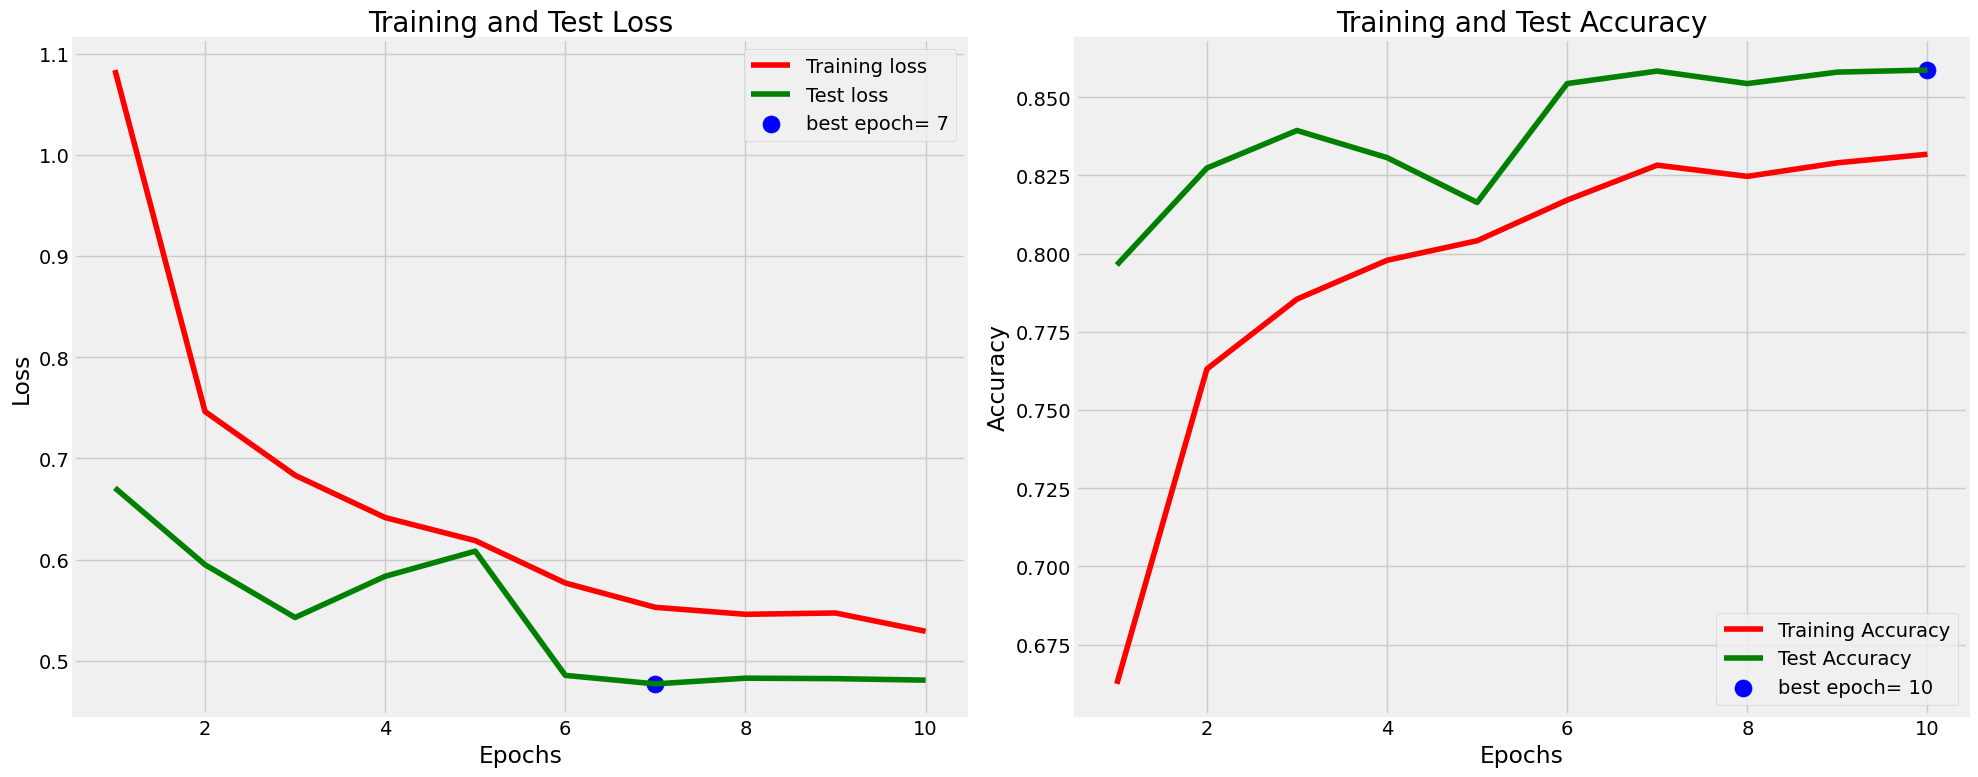

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']  # Ganti 'test_accuracy' menjadi 'val_accuracy'
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Test loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Test Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
pretrained_model.trainable = True
for layer in pretrained_model.layers:
    if isinstance(layer, layers.BatchNormalization):
        layer.trainable = False

for l in pretrained_model.layers[:10]:
    print(l.name, l.trainable)

model.compile(
    optimizer=Adam(0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# model.load_weights('./checkpoints/my_checkpoint')
print(model.summary())
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=test_images,  # Ganti ke test_images
    validation_steps=len(test_images),
    epochs=10,
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min')
    ]
)
model.save_weights('./checkpoints/my_checkpoint')


input_1 True
rescaling True
normalization True
rescaling_1 True
stem_conv_pad True
stem_conv True
stem_bn False
stem_activation True
block1a_dwconv True
block1a_bn False
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 AugmentationLayer (Sequent  (None, None, None, None   0         
 ial)                        )                                   
                                                                 
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 activation (Activation

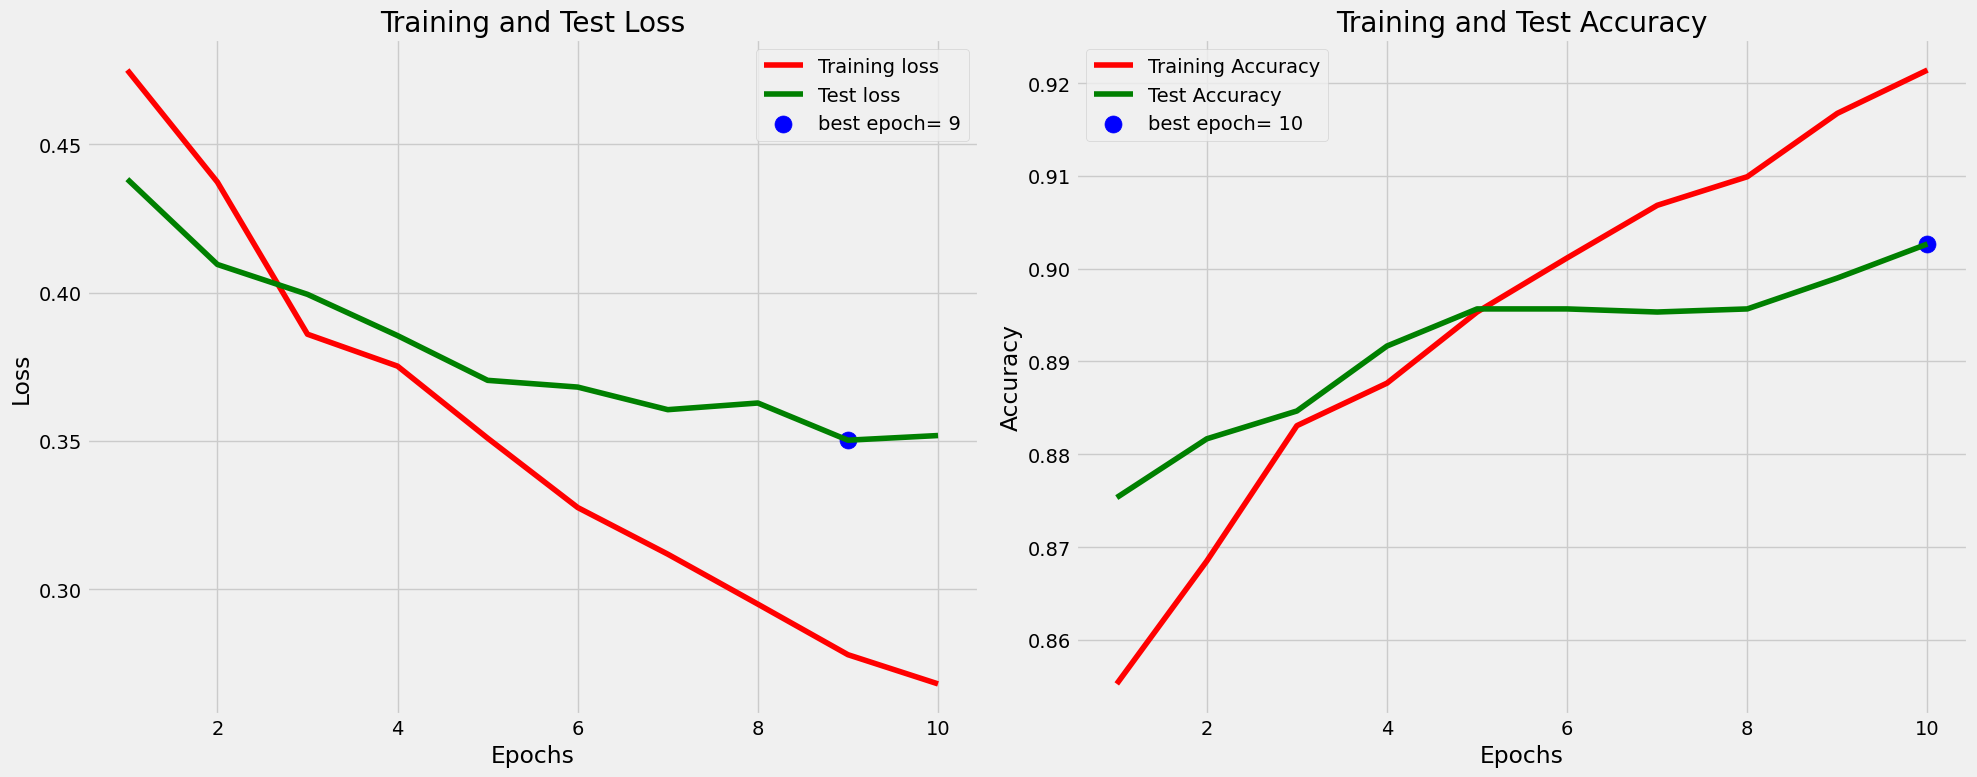

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Test loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Test Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Converter and Result

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("Train Loss: {:.5f}".format(tr_loss[-1]))
print("Train Accuracy: {:.2f}%".format(tr_acc[-1] * 100))
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))


Train Loss: 0.26807
Train Accuracy: 92.14%
Test Loss: 0.35179
Test Accuracy: 90.27%


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
